In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns; sns.set()


In [7]:
X = pd.DataFrame(
    np.array([5,7,8, np.NaN, np.NaN, np.NaN, -5,
              0,25,999,1,-1, np.NaN, 0, np.NaN]).reshape((5,3)))
X.columns = ['f1', 'f2', 'f3'] #feature 1, feature 2, feature 3

In [8]:
X

,f1,f2,f3
0,5.0,7.0,8.0
1,NaN,NaN,NaN
2,-5.0,0.0,25.0
3,999.0,1.0,-1.0
4,NaN,0.0,NaN


In [9]:
X.dropna(axis=0,thresh=1,inplace=True)

In [11]:
X.reset_index(inplace=True)


In [12]:
X

,index,f1,f2,f3
0,0,5.0,7.0,8.0
1,2,-5.0,0.0,25.0
2,3,999.0,1.0,-1.0
3,4,NaN,0.0,NaN


In [13]:
X.drop(['index'], axis=1, inplace=True)

In [14]:
X

,f1,f2,f3
0,5.0,7.0,8.0
1,-5.0,0.0,25.0
2,999.0,1.0,-1.0
3,NaN,0.0,NaN


In [15]:
from sklearn.impute import MissingIndicator
X.replace({999.0 : np.NaN}, inplace=True)
indicator = MissingIndicator(missing_values=np.NaN)
indicator = indicator.fit_transform(X)
indicator = pd.DataFrame(indicator, columns=['m1', 'm3'])

In [17]:
indicator

,m1,m3
0,False,False
1,False,False
2,True,False
3,True,True


In [19]:
X.fillna(X.mean(), inplace=True)
X

,f1,f2,f3
0,5.0,7.0,8.000000
1,-5.0,0.0,25.000000
2,0.0,1.0,-1.000000
3,0.0,0.0,10.666667


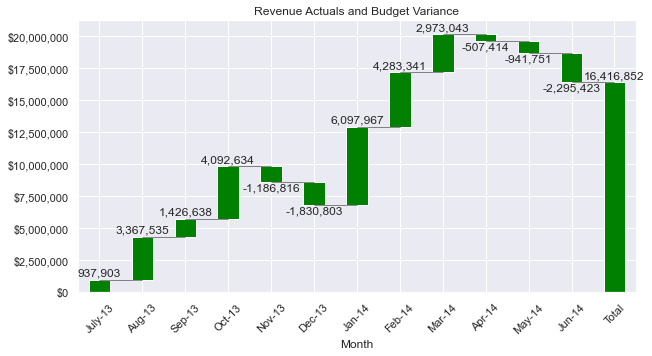

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#Use python 2.7+ syntax to format currency
def money(x, pos):
    'The two args are the value and tick position'
    return "${:,.0f}".format(x)
formatter = FuncFormatter(money)

#Data to plot. Do not include a total, it will be calculated
index = ['July-13','Aug-13','Sep-13','Oct-13','Nov-13','Dec-13','Jan-14', 'Feb-14', 'Mar-14','Apr-14','May-14','Jun-14']
data = {'amount': [937902.89,3367534.58,1426638.31,4092633.73,-1186816.20,-1830803.44,
                   6097966.94,4283340.57,2973042.87,-507414.44,-941750.88,-2295423.05]}

#Store data and create a blank series to use for the waterfall
trans = pd.DataFrame(data=data,index=index)
blank = trans.amount.cumsum().shift(1).fillna(0)

#Get the net total number for the final element in the waterfall
total = trans.sum().amount
trans.loc["Total"]= total
blank.loc["Total"] = total

#The steps graphically show the levels as well as used for label placement
step = blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3] = np.nan

#When plotting the last element, we want to show the full bar,
#Set the blank to 0
blank.loc["Total"] = 0

#Plot and label
my_plot = trans.plot(kind='bar', color='green', stacked=True, bottom=blank,legend=None, figsize=(10, 5), 
                     title="Revenue Actuals and Budget Variance")
my_plot.plot(step.index, step.values,'k', linewidth=0.5)
my_plot.set_xlabel("Month")

#Format the axis for dollars
my_plot.yaxis.set_major_formatter(formatter)

#Get the y-axis position for the labels
y_height = trans.amount.cumsum().shift(1).fillna(0)

#Get an offset so labels don't sit right on top of the bar
max = trans.max()
neg_offset = max / 25
pos_offset = max / 50
plot_offset = int(max / 15)

#Start label loop
loop = 0
for index, row in trans.iterrows():
    # For the last item in the list, we don't want to double count
    if row['amount'] == total:
        y = y_height[loop]
    else:
        y = y_height[loop] + row['amount']
    # Determine if we want a neg or pos offset
    if row['amount'] > 0:
        y += pos_offset
    else:
        y -= neg_offset
    my_plot.annotate("{:,.0f}".format(row['amount']),(loop,y),ha="center")
    loop+=1

#Scale up the y axis so there is room for the labels
my_plot.set_ylim(0,blank.max()+int(plot_offset))
#Rotate the labels
my_plot.set_xticklabels(trans.index,rotation=45)
my_plot.get_figure().savefig("waterfall.png",dpi=200,bbox_inches='tight')

In [12]:
my_plot.get_figure().savefig("waterfall.png",dpi=200,bbox_inches='tight')

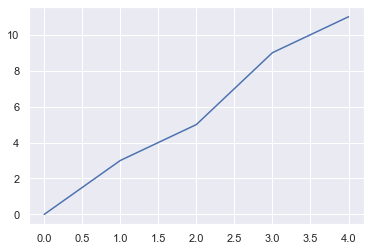

In [14]:
plt.plot([0, 1, 2, 3, 4], [0, 3, 5, 9, 11])
plt.savefig('books_read.png')

In [8]:
import statistics
list=[61, 65, 63, 64,66]
statistics.median(list)

64

In [9]:
import statistics
list=[58, 65, 63, 64,66]
statistics.median(list)

64

In [10]:
list = [2,2,2, 4,4,5,5,6,8,11,12,16,18]
statistics.median(list)

5

In [44]:
import sys 
  
name = sys.stdin.readline() 
print(name) 
  
num = sys.stdin.readline(2) 
print(num) 

In [8]:
from collections import Counter 
  
def removeElements(lst, t): 
    counted = Counter(lst) 
      
    remove_lst = [] 
    for i in counted: 
        if counted[i] < t: 
            remove_lst.append(i) 
              
    res_lst = [] 
    for i in lst: 
        if i not in remove_lst: 
            res_lst.append(i) 
              
    print(' '.join(res_lst)) 
      
 
lst = input()
t = 2
removeElements(lst, t)

#print(' '.join(removeElements(lst, t))) 

 234445656


4 4 4 5 6 5 6


In [15]:
word=input( )
a = (word[(len(word)-1)-len(word)])
b = (word[(len(word)-2)-len(word)])
if a.isupper() or b.isupper():
    print(" ".join((a+b).lower()))
else:
    print(" ".join((a+b)))

 AppLe


e l


In [18]:
from collections import Counter
list = [1,2,3,4,5,4,4,3]
counted = Counter(list)
counted

Counter({1: 1, 2: 1, 3: 2, 4: 3, 5: 1})

In [25]:
counted[2]

1

In [2]:
c = [[1, 2], [3, 4], [5, 6]]
# Let's convert this matrix to a 1 dimensional list.
import itertools as it
newlist = list(it.chain.from_iterable(c))

In [3]:
newlist

[1, 2, 3, 4, 5, 6]

In [9]:
import requests
data = requests.get("https://api.covid19api.com/world")
# https://api.covid19api.com/summary

In [11]:
data.text
df = pd.read_json(data.text)

In [15]:
df.head(5)

,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
0,70272,3039914,4620,211113,28234,893322
1,75128,3098828,5973,216658,34644,925285
2,82289,2054826,8266,134152,36758,510380
3,118196,5898252,4785,367273,65964,2415401
4,0,3842902,0,270014,0,1233826


In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df)

In [27]:
train.head(5)

,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
61,101781,6829314,3800,402636,131192,3000504
54,86233,3040879,5480,208785,62916,901839
52,124338,7339755,4974,419389,82260,3375017
10,95756,5677213,4319,357189,55218,2286305
37,118483,7458238,4838,424227,79139,3454156


In [28]:
test.head(5)

,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
49,101362,4617583,5335,313328,49174,1636416
19,100749,5394790,4043,348546,55542,2111534
48,118757,7731676,3990,433502,72581,3612626
0,70272,3039914,4620,211113,28234,893322
31,154681,7612919,5292,429514,85889,3540045


In [32]:
train['TotalConfirmed'].head(5)

61    6829314
54    3040879
52    7339755
10    5677213
37    7458238
Name: TotalConfirmed, dtype: int64

In [57]:
feature = 'TotalConfirmed'
target = 'TotalDeaths'
trainX = train[feature]
trainy = train[target]
testX = test[feature]
testy = test[target]

In [58]:
trainX.head(5)

61    6829314
54    3040879
52    7339755
10    5677213
37    7458238
Name: TotalConfirmed, dtype: int64

In [59]:
trainX.shape

(46,)

In [60]:
from sklearn.linear_model import Lasso
model = Lasso()

In [61]:
trainX = trainX.to_numpy().reshape(-1,1)
trainy = trainy.to_numpy().reshape(-1,1)

In [62]:
trainX[0:6]

array([[6829314],
       [3040879],
       [7339755],
       [5677213],
       [7458238],
       [4420028]])

In [63]:
trainX.shape

(46, 1)

In [64]:
model.fit(trainX,trainy)

Lasso()

In [65]:
testX = testX.to_numpy().reshape(-1,1)
yhat = model.predict(testX)

In [66]:
yhat

array([296195.28056545, 338774.70709163, 466801.43065055, 209762.39811826,
       460295.30685603, 161031.41749196, 344154.94062199, 155794.17328521,
       290642.19978759, 160582.12421881, 161290.55140026, 170123.89491798,
       181234.05579195, 397810.39685409, 253754.24140763, 432497.4701393 ])

In [67]:
from sklearn.metrics import r2_score
print(r2_score(testy,yhat))

0.9741080615404466
